In [32]:
#pip install nba_api

from nba_api.stats.endpoints import teamyearbyyearstats
from nba_api.stats.static import teams
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# Create raw dataset of NBA team stats

class NBADataAnalyzer:
    def __init__(self):
        self.nba_teams = teams.get_teams()
        self.dataframes = []
        self.combined_data = None
    
    def get_team_data(self):
        for team in self.nba_teams:
            team_id = team['id']
            team_stats = teamyearbyyearstats.TeamYearByYearStats(team_id=team_id)
            data = team_stats.get_data_frames()[0]
            self.dataframes.append(data)
    
    def combine_dataframes(self):
        self.combined_data = pd.concat(self.dataframes)
    
    def display_combined_data(self):
        if self.combined_data is not None:
            return self.combined_data
        else:
            print("No data available. Please run 'get_team_data' and 'combine_dataframes' first.")


nbadataanalyzer = NBADataAnalyzer()
nbadataanalyzer.get_team_data()
nbadataanalyzer.combine_dataframes()
nbadataanalyzer.display_combined_data()


,TEAM_ID,TEAM_CITY,TEAM_NAME,YEAR,GP,WINS,LOSSES,WIN_PCT,CONF_RANK,DIV_RANK,...,OREB,DREB,REB,AST,PF,STL,TOV,BLK,PTS,PTS_RANK
0,1610612737,Tri-Cities,Blackhawks,1949-50,64,29,35,0.453,0,3,...,0,0,0,1330,2057,0,0,0,5313,10
1,1610612737,Tri-Cities,Blackhawks,1950-51,68,25,43,0.368,0,5,...,0,0,0,1476,2092,0,0,0,5730,3
2,1610612737,Milwaukee,Hawks,1951-52,66,17,49,0.258,0,5,...,0,0,0,1229,1848,0,0,0,4833,10
3,1610612737,Milwaukee,Hawks,1952-53,71,27,44,0.380,0,5,...,0,0,0,1427,2120,0,0,0,5389,9
4,1610612737,Milwaukee,Hawks,1953-54,72,21,51,0.292,0,4,...,0,0,0,1298,1771,0,0,0,5038,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,1610612766,Charlotte,Hornets,2019-20,65,23,42,0.354,10,4,...,715,2066,2781,1549,1223,428,949,268,6687,30
30,1610612766,Charlotte,Hornets,2020-21,72,33,39,0.458,10,4,...,762,2389,3151,1933,1298,565,1069,344,7881,23
31,1610612766,Charlotte,Hornets,2021-22,82,43,39,0.524,10,3,...,888,2767,3655,2302,1629,707,1087,402,9457,4
32,1610612766,Charlotte,Hornets,2022-23,82,27,55,0.329,14,5,...,901,2751,3652,2062,1661,634,1164,425,9098,27


In [34]:
combined_data.columns

Index(['TEAM_ID', 'TEAM_CITY', 'TEAM_NAME', 'YEAR', 'GP', 'WINS', 'LOSSES',
       'WIN_PCT', 'CONF_RANK', 'DIV_RANK', 'PO_WINS', 'PO_LOSSES',
       'CONF_COUNT', 'DIV_COUNT', 'NBA_FINALS_APPEARANCE', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'PF', 'STL', 'TOV', 'BLK', 'PTS', 'PTS_RANK'],
      dtype='object')

In [35]:
# Clean data for different analysis
class DataCleaning:
    def filter_fg3_data(self, combined_data):
        filtered_data = combined_data[combined_data['YEAR'] > '1982-1983']
        return filtered_data
        
    # Add more methods to clean data for different analysis


datacleaning = DataCleaning()
filtered_fg3_data = datacleaning.filter_fg3_data(nbadataanalyzer.combined_data)

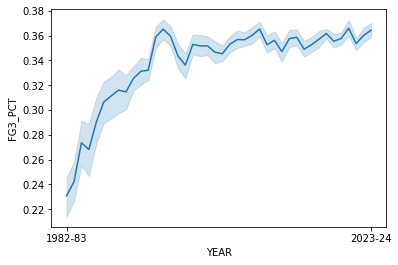

In [36]:
# Plot FG3_PCT over time
class FG3PCTLineChart:
    def __init__(self, filtered_fg3_data):
        self.filtered_fg3_data = filtered_fg3_data
    
    def plot_chart(self):
        sns.lineplot(data=self.filtered_fg3_data, x="YEAR", y="FG3_PCT")
        min_year = self.filtered_fg3_data["YEAR"].min()
        max_year = self.filtered_fg3_data["YEAR"].max()
        plt.xticks([min_year, max_year])
        plt.show()

fg3_chart = FG3PCTLineChart(filtered_fg3_data)
fg3_chart.plot_chart()